Code repurposed from Kaggle [https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-cryptocurrencies]

## import dependencies

In [1]:
import pandas as pd
import pandas_datareader as web
import numpy as np
from pathlib import Path
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

from yahoo_fin.stock_info import get_data

%matplotlib inline

## load and inspect data

In [2]:
crypto_currency = 'CRO'
against_currency = 'USD'

start = dt.datetime(2019,1,1)
end = dt.datetime.now()

base_df = get_data(f'{crypto_currency}-{against_currency}', start, end, index_as_date = True, interval = '1d')
base_df

,open,high,low,close,adjclose,volume,ticker
2019-01-01,0.020354,0.021571,0.019954,0.021466,0.021466,2003417.0,CRO-USD
2019-01-02,0.021527,0.021672,0.020869,0.021441,0.021441,1988273.0,CRO-USD
2019-01-03,0.021448,0.021828,0.021073,0.021424,0.021424,2409212.0,CRO-USD
2019-01-04,0.021359,0.021674,0.021193,0.021559,0.021559,2407523.0,CRO-USD
2019-01-05,0.021495,0.021721,0.018613,0.018613,0.018613,1821065.0,CRO-USD
...,...,...,...,...,...,...,...
2021-07-02,0.113903,0.119593,0.112773,0.118407,0.118407,45780377.0,CRO-USD
2021-07-03,0.118389,0.125262,0.117165,0.122427,0.122427,41744859.0,CRO-USD
2021-07-04,0.122467,0.122467,0.113482,0.115814,0.115814,47289131.0,CRO-USD
2021-07-05,0.115725,0.124989,0.115725,0.122856,0.122856,152076430.0,CRO-USD


In [3]:
base_df['spread'] = base_df.high - base_df.low
base_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 919 entries, 2019-01-01 to 2021-07-06
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   open      743 non-null    float64
 1   high      743 non-null    float64
 2   low       743 non-null    float64
 3   close     743 non-null    float64
 4   adjclose  743 non-null    float64
 5   volume    743 non-null    float64
 6   ticker    919 non-null    object 
 7   spread    743 non-null    float64
dtypes: float64(7), object(1)
memory usage: 64.6+ KB


## Plot the closing value of Crypto.com Coin over time

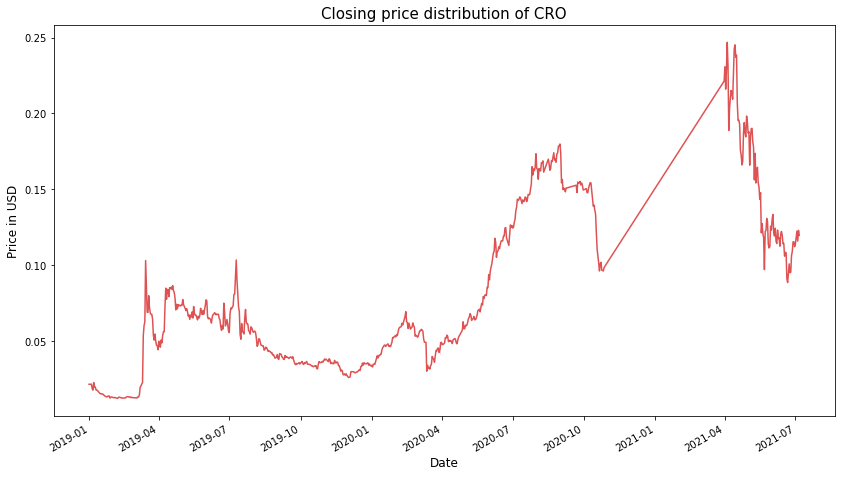

In [4]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.close.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Closing price distribution of CRO", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Daily price spread of CRO')

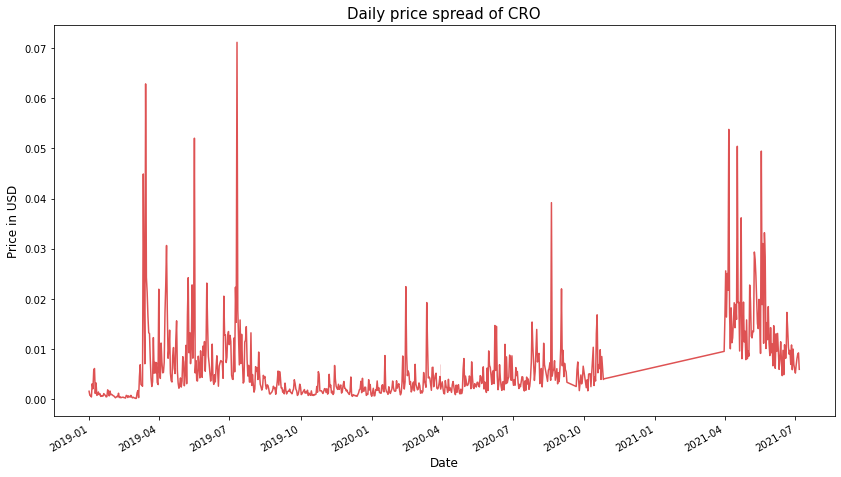

In [5]:
fig, ax = plt.subplots(figsize=(14,8))

sns.lineplot(y = base_df.spread.values, x=base_df.index.values, alpha=0.8, color=color[3])
ax.xaxis.set_major_locator(mdates.AutoDateLocator())

fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Daily price spread of CRO", fontsize=15)

## Candlestick chart

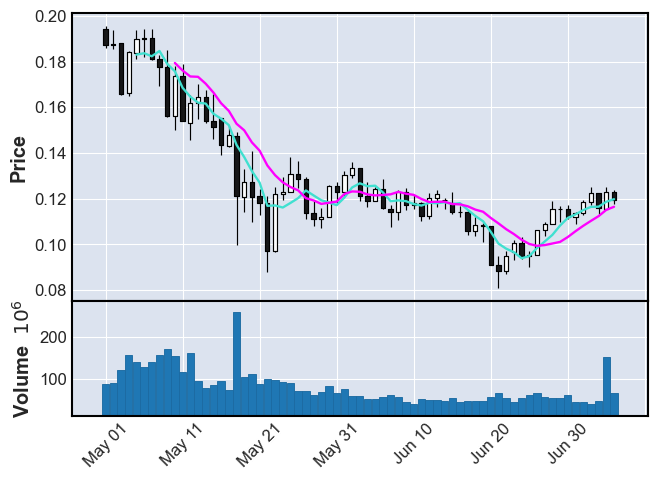

In [14]:
import matplotlib.ticker as mticker
import mplfinance as mpf

temp_base_df = base_df.copy(deep=False)

temp_base_df = temp_base_df.drop(['spread'], axis=1)
mpf.plot(temp_base_df.loc['2021-5-1':], type='candle', mav=(5,10), volume=True)

## Future Price Prediction

In [7]:
from fbprophet import Prophet

In [8]:
price_predict_df = base_df['close'].copy(deep=False).reset_index()
price_predict_df.columns = ["ds", "y"]
#price_predict_df = price_predict_df[price_predict_df['ds']>'2020-6-1']
price_predict_df

,ds,y
0,2019-01-01,0.021466
1,2019-01-02,0.021441
2,2019-01-03,0.021424
3,2019-01-04,0.021559
4,2019-01-05,0.018613
...,...,...
914,2021-07-02,0.118407
915,2021-07-03,0.122427
916,2021-07-04,0.115814
917,2021-07-05,0.122856


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
941,2021-08-01,0.097146,0.082699,0.111648
942,2021-08-02,0.096198,0.081316,0.111128
943,2021-08-03,0.096088,0.081099,0.112237
944,2021-08-04,0.095654,0.080955,0.110480
945,2021-08-05,0.094740,0.079514,0.111391


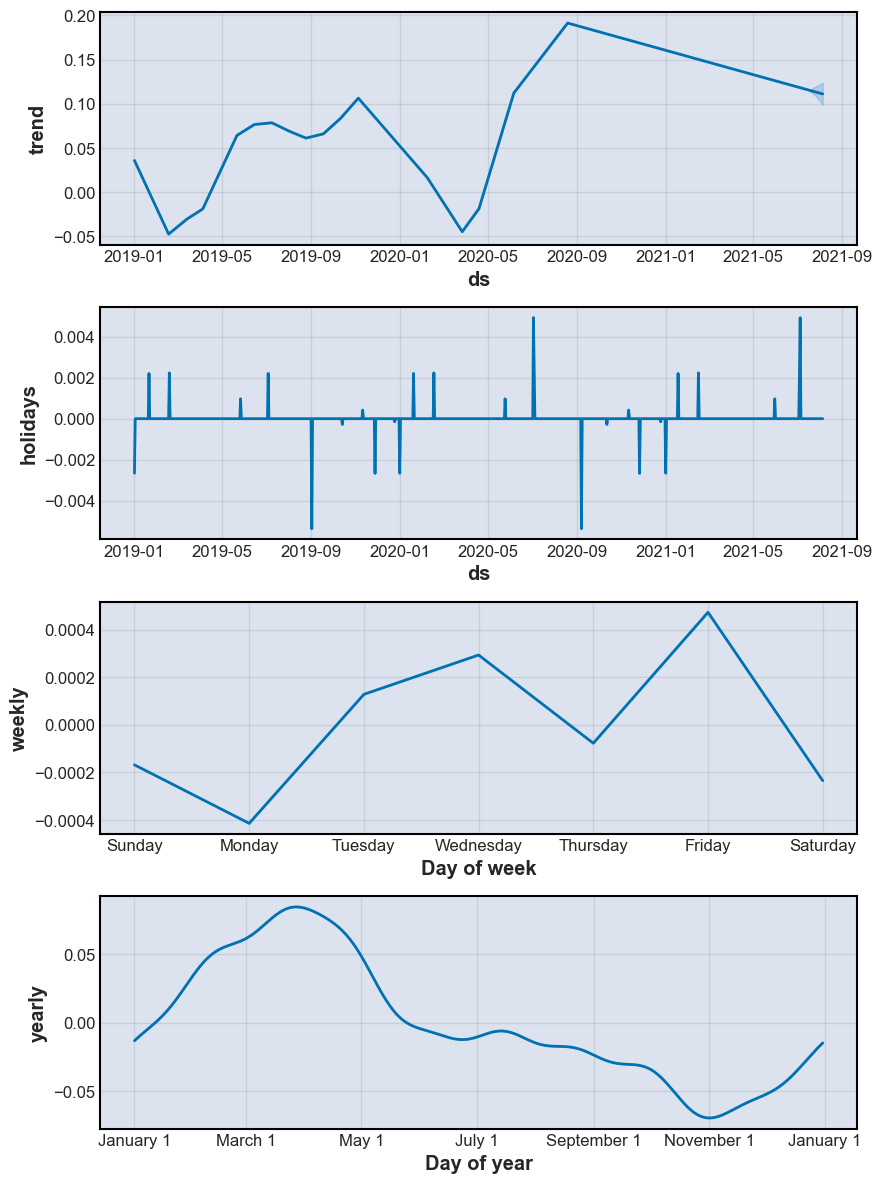

In [9]:
m = Prophet(changepoint_prior_scale=.7)
m.add_country_holidays(country_name='US')
#m.add_country_holidays(country_name='CN')
m.fit(price_predict_df);
m.train_holiday_names

future = m.make_future_dataframe(periods=30)

forecast = m.predict(future)
fig = m.plot_components(forecast)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

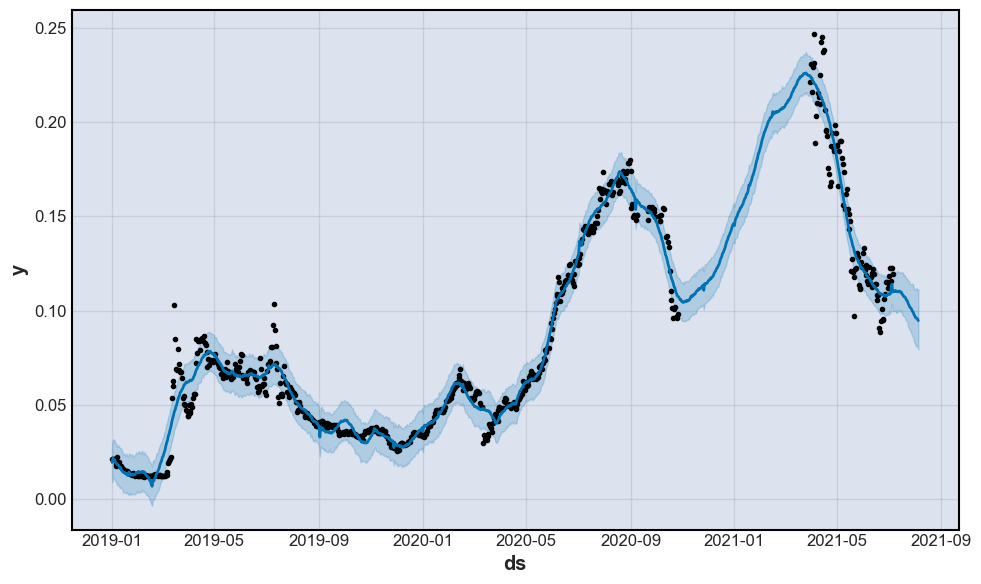

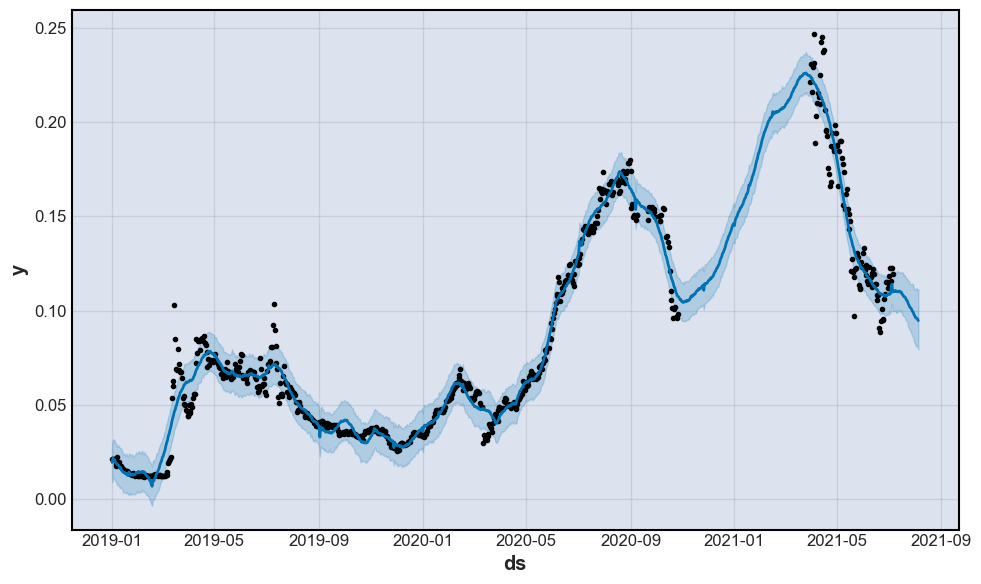

In [10]:
m.plot(forecast)